Скачайте текст войны и мир (ссылка на github и гугл диск). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов
Выберите ряд и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.


In [2]:
import glob
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [3]:
text = ""
for filename in glob.glob("./*.txt"):
    f = open(filename, 'r', encoding='utf8')
    text += (f.read())
    f.close()
print(len(text))

2993415


In [4]:
text = re.sub('[^а-яА-Я ]','', text)

In [5]:
text = re.sub(' +',' ', text)

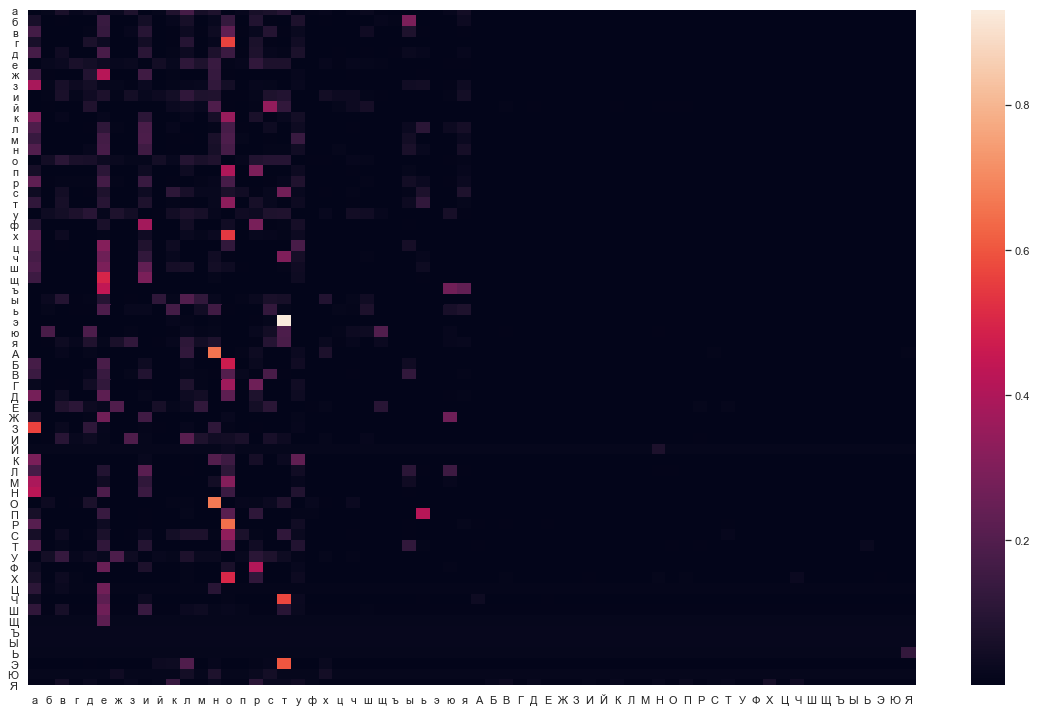

In [6]:
RUSSIAN = 'абвгдежзийклмнопрстуфхцчшщъыьэюя'
RUSSIAN += RUSSIAN.upper()
POS = {l: i for i, l in enumerate(RUSSIAN)}

probabilities = np.ones((len(RUSSIAN), len(RUSSIAN)))

for cp, cn in zip(text[:-1], text[1:]):
    if (cp!=' ') and (cn!=' '):
        probabilities[POS[cp], POS[cn]] += 1

probabilities = (probabilities / probabilities.sum(axis=1)[:, None])
    

df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

plt.figure(figsize=(16,10))
sns.heatmap(df, xticklabels=True, yticklabels=True)
plt.tight_layout()
plt.show()

In [7]:
df.head()

,а,б,в,г,д,е,ж,з,и,й,...,Ц,Ч,Ш,Щ,Ъ,Ы,Ь,Э,Ю,Я
а,0.000156,0.011540,0.062077,0.015896,0.036020,0.018248,0.022398,0.075898,0.002245,0.012180,...,0.000014,0.000107,0.000036,0.000007,0.000007,0.000007,0.000007,0.000050,0.000007,0.000043
б,0.059204,0.000674,0.005826,0.000755,0.001618,0.141308,0.000539,0.000081,0.050249,0.000027,...,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027
в,0.166518,0.000371,0.000964,0.001126,0.008962,0.132898,0.000035,0.015045,0.094612,0.000012,...,0.000023,0.000070,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000023,0.000012
г,0.059897,0.000024,0.002393,0.000095,0.065844,0.029854,0.000071,0.000095,0.046036,0.000024,...,0.000024,0.000071,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024
д,0.167532,0.001356,0.038836,0.000293,0.001140,0.176039,0.000601,0.000123,0.103392,0.000031,...,0.000015,0.000046,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015


In [8]:
start = POS['п']
end = POS['р']
prior = 1. / len(RUSSIAN)
proba_sum = 0.
for c1 in RUSSIAN:
    for c2 in RUSSIAN:
        proba = prior * probabilities[start, POS[c1]] * probabilities[POS[c1], POS[c2]] * probabilities[POS[c2], end]
        proba_sum += proba

In [9]:
proba_sum

0.0006258721718769551

In [12]:
s = []
start = 'Б'
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUSSIAN), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

Бовиезноч


### Прогноз  HMM

In [21]:
from hmmlearn.hmm import GaussianHMM

In [31]:
series =pd.read_csv("weekly-closings-of-the-dowjones-.csv")['Close']

In [32]:
values = series.values.reshape(-1,1)

X_train = values[:100]
X_test = values[100:]

In [33]:
X_train.shape, X_test.shape

((100, 1), (62, 1))

In [34]:

for n in range(1, 20):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(X_train)
    print (n, model.score(X_train))

1 -534.0729968891143
2 -492.0566463531909
3 -458.192798114133
4 -442.1062022492357
5 -430.43745437755086
6 -425.7049769800822
7 -411.43867196121613
8 -403.51136312038216


Fitting a model with 119 free scalar parameters with only 100 data points will result in a degenerate solution.
Fitting a model with 142 free scalar parameters with only 100 data points will result in a degenerate solution.


9 -393.44172415804724
10 -385.7178276476163


Fitting a model with 167 free scalar parameters with only 100 data points will result in a degenerate solution.
Fitting a model with 194 free scalar parameters with only 100 data points will result in a degenerate solution.


11 -374.4892291017737
12 -372.03774865967006


Fitting a model with 223 free scalar parameters with only 100 data points will result in a degenerate solution.
Fitting a model with 254 free scalar parameters with only 100 data points will result in a degenerate solution.


13 -357.0058472909096
14 -360.04769349054135


Fitting a model with 287 free scalar parameters with only 100 data points will result in a degenerate solution.


15 -354.9918647300382


Fitting a model with 322 free scalar parameters with only 100 data points will result in a degenerate solution.


16 -354.3574077810718


Fitting a model with 359 free scalar parameters with only 100 data points will result in a degenerate solution.


17 -340.4531897921106


Fitting a model with 398 free scalar parameters with only 100 data points will result in a degenerate solution.


18 -335.54260100246256
19 -335.29635201019613


Fitting a model with 398 free scalar parameters with only 100 data points will result in a degenerate solution.


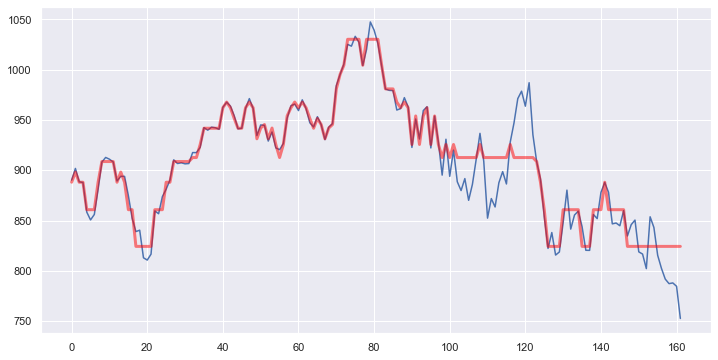

In [35]:
model = GaussianHMM(n_components=19,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(X_train)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3, alpha=0.5, color='red')